
#### Latihan Aplikasi Ramalan Cuaca
#### Prakiraan Cuaca 
#### input : Masukkan Nama Kota : 
#### Output nya :

- Kota Yang Anda Pilih : .... 
- Suhu : .... (Celcius)
- Keadaan cuaca :  'Berawan'
- Koordinat Kota Anda : lat - long 
- Humidity Level : ...
- Kecepatan Angin : ....

- Kalau kota tidak ada :
- Keluar Notif : Kota Yang Anda masukkan tidak terdaftar


#### Gunakan API openweather







In [7]:
import requests
key = '05ba2c36dae023c55fcf51d414e2a873'
host = 'api.openweathermap.org'
kota = input("Masukan kota yang anda pilih :")
kota = kota.capitalize ()
url = f"http://{host}/data/2.5/weather?q={kota}&appid={key}"
data = requests.get(url) # untuk melakukan request ke API yang dituju
cuaca = data.json()
# print (cuaca['cod'])
while (cuaca['cod'] == "404"):  #jika kota tidak ditemukan , maka akan melakukan looping lagi
    cuaca = {'cod': '404', 'message': 'Kota yang anda masukan tidak ada dibumi'}
    #merubah format message sesuai dengan ketentuan
    print(cuaca)
    kota = input("Masukan kota yang anda pilih :")
    kota = kota.capitalize ()
    url = f"http://{host}/data/2.5/weather?q={kota}&appid={key}"
    data = requests.get(url)
    cuaca = data.json() 
nama = cuaca['name']
suhu= cuaca['main']['temp']
kondisi= cuaca['weather'][0]['main']
koor= cuaca['coord']
hum_level= cuaca['main']['humidity']
wind = cuaca['wind']['speed']
# print(cuaca)
print(f"Kota yang anda pilih:{nama}")
print(f"Suhu: {suhu- 273.15} Celcius")
print(f"Keadaan Cuaca {kondisi}")
print(f"Koordinat kota anda {koor}")
print(f"Humidity Level {hum_level}")
print(f"Kecepatan Angin {wind}")

Masukan kota yang anda pilih :arif
{'cod': '404', 'message': 'Kota yang anda masukan tidak ada dibumi'}
Masukan kota yang anda pilih :jakarta
{'coord': {'lon': 106.85, 'lat': -6.21}, 'weather': [{'id': 721, 'main': 'Haze', 'description': 'haze', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 305.64, 'feels_like': 310.72, 'temp_min': 303.15, 'temp_max': 307.04, 'pressure': 1012, 'humidity': 62}, 'visibility': 5000, 'wind': {'speed': 1.27, 'deg': 26}, 'clouds': {'all': 20}, 'dt': 1600051098, 'sys': {'type': 1, 'id': 9383, 'country': 'ID', 'sunrise': 1600037184, 'sunset': 1600080611}, 'timezone': 25200, 'id': 1642911, 'name': 'Jakarta', 'cod': 200}
Kota yang anda pilih:Jakarta
Suhu: 32.49000000000001 Celcius
Keadaan Cuaca Haze
Koordinat kota anda {'lon': 106.85, 'lat': -6.21}
Humidity Level 62
Kecepatan Angin 1.27


#### Zomato
#### Selamat Datang di Aplikasi Tomatos : 
#### Silakan pilih Opsi 
1. Mencari Resto 
2. Daily Menu

( While Loop)


a. Mencari Restoran di Kota Tertentu 
#### Input : 
- Masukkan Nama Kota : 
- Masukkan Jumlah Restoran yang akan ditampilkan : 

#### Output : 
- Nama Restoran : 
- Establishment Name :
- Cuisine Name : 
- Alamat : 
- No Telfon : 
- Rating (Angka) : 
- Review (Angka) :

b. Daily Menu : Menu Harian 

#### Input :
- Masukkan Nama Resto : 
- Masukkan Nama Kota : 
- Jumlah Menu yang akan ditampilkan : 

#### Output :
Menu di restoran tersebut sejumlah n




In [8]:
import requests
print("Selamat Datang di Aplikasi Tomatos")
print("Silakan pilih Opsi: ")
print(" 1.Mencari Resto")
print(" 2.Daily Menu")
Host = 'https://developers.zomato.com/api/v2.1' #host untuk akses API
Key = '5d7b6a190680b1e7055412be09e73580' #key untuk get API
Headinfo = {"user-key": Key} # key API
loc = '/cities'
pilih = input("pilih: ") #untuk memilih opsi antara mencari resto atau melihat daily menu resto
while True: #melakukan kondisi looping, agar jika error akan melakukan running secara otomatis
    try: #memberikan kondisi try dan except, agar ketika error tidak terjadi bug
        pilih = int(pilih)
        while (pilih > 2 or pilih < 1)  : #melakukan looping jika angka yang di input tidak sesuai opsi
            print("Opsi yang anda pilih tidak ada, Silahkan pilih antara angka 1 atau 2 ")
            print("="*100)
            print("Selamat Datang di Aplikasi Tomatos")
            print("Silakan pilih Opsi: ")
            print(" 1.Mencari Resto")
            print(" 2.Daily Menu")
            pilih = int(input("pilih: "))
            #1. mencari resto
        if pilih == 1: 
            kota = input("Masukan Nama Kota: ")
            url_kota = f"{Host}{loc}?q={kota}"
            data_kota = requests.get(url_kota, headers = Headinfo)
            output = data_kota.json()
            while True : 
        #melakukan looping lagi agar jika ada error, tidak kembali ke proses awal
                try: 
                    lokasi = output['location_suggestions']
                    loc_id =(lokasi[0]['id'])
                    cari = '/search'
                    jumlah_resto = input("Masukan jumlah restoran yang akan ditampilkan: ")
                    try:
                        jumlah_resto = int(jumlah_resto)
                        while jumlah_resto <0 : #melakukan looping ketika format tidak sesuai
                            print('format yang anda tulis salah')
                            print('='*100)
                            jumlah_resto = int(input("Masukan jumlah restoran yang akan ditampilkan: "))
                        url_search = f"{Host}{cari}?entity_id={loc_id}&entity_type=city&count={jumlah_resto}" #url untuk melihat restaurant yang ada dikota tersebut
                        data_cari = requests.get(url_search, headers =Headinfo)
                        hasil = data_cari.json()
                        #melakukan looping untuk mencetak informasi detail dari restoran
                        for i  in range (jumlah_resto): 
                            print(f"{i+1}. Restaurant name: {hasil['restaurants'][i]['restaurant']['name']}")
                            print(f"   Establishment name: {hasil['restaurants'][i]['restaurant']['establishment']}")
                            print(f"   Cuisine name: {hasil['restaurants'][i]['restaurant']['cuisines']}")
                            print(f"   Address: {hasil['restaurants'][i]['restaurant']['location']['address']}")
                            print(f"   Phone number: {hasil['restaurants'][i]['restaurant']['phone_numbers']}")
                            print(f"   Rating: {hasil['restaurants'][i]['restaurant']['user_rating']['aggregate_rating']}")
                            print(f"   Total review: {hasil['restaurants'][i]['restaurant']['all_reviews_count']}")
                        break #dilakukan break agar tidak terjadi looping ketika data resto berhasil ditampilkan
                    except:
                        print('Format harus angka')
                        print('='*100)
                except:
                    print('Nama kota tidak ada di bumi')
                    print('='*100)
                    kota = input("Masukan Nama Kota: ")
                    url_kota = f"{Host}{loc}?q={kota}"
                    data_kota = requests.get(url_kota, headers = Headinfo)
                    output = data_kota.json()
                    continue #fungsi ini agar kembali looping ke proses 1
#   untuk melihat menu harian sebuah resto
        if pilih == 2 :
            print("2. Daily Menu")
            resto = input("Masukkan Nama Resto: ")
            kota = input("Masukkan Nama Kota: ")
                #Mencari ID Nama kota yang diinput
            url_kota = f"{Host}{loc}?q={kota}" #url untuk mendapatkan ID nama kota
            
            while True : 
                try :
                    data_kota = requests.get(url_kota, headers = Headinfo)
                    output = data_kota.json()
                    lokasi = output['location_suggestions']
                    loc_id =(lokasi[0]['id'])
                    cari = '/search'
                    url_search = f"{Host}{cari}?entity_id={loc_id}&entity_type=city&q={resto}&count=1" 
                    #url untuk melihat restaurant yang ada dikota tersebut
                    data_cari = requests.get(url_search, headers =Headinfo)
                    hasil = data_cari.json()
                    resto_id =  (hasil["restaurants"][0]["restaurant"]['id'])
                    nama_resto =  (hasil["restaurants"][0]["restaurant"]["name"])
                    url_resto= f"{Host}/dailymenu?res_id={resto_id}"
                    data_resto = requests.get(url_resto, headers =Headinfo)
                    hasil_resto = data_resto.json()
                    print(f"Total menu di restoran tersebut sejumlah: {len(hasil_resto['daily_menus'][0]['daily_menu']['dishes'])} ")
                    jumlah_menu = int(input("Jumlah Menu yang akan ditampilkan: "))
                    for i  in range (jumlah_menu):
                        print(f"{i+1}.Nama Makanan {hasil_resto['daily_menus'][0]['daily_menu']['dishes'][i]['dish']['name']}")
                        print(f"  Harga Makanan    {hasil_resto['daily_menus'][0]['daily_menu']['dishes'][i]['dish']['price']}")        
                    break
                except:
                    print(f"restaurant {resto} tidak menampilkan daily menu")
                    print('='*100)
                    resto = input("Masukkan Nama Resto: ")
                    kota = input("Masukkan Nama Kota: ")
                #Mencari ID Nama kota yang diinput
                    url_kota = f"{Host}{loc}?q={kota}"
                    data_kota = requests.get(url_kota, headers = Headinfo)
                    output = data_kota.json()
                    continue
        break
    except:
        print('Format salah')
        print("="*100)
        print("Selamat Datang di Aplikasi Tomatos")
        print("Silakan pilih Opsi: ")
        print(" 1.Mencari Resto")
        print(" 2.Daily Menu")
        Host = 'https://developers.zomato.com/api/v2.1' #host untuk akses API
        Key = '5d7b6a190680b1e7055412be09e73580' #key untuk get API
        Headinfo = {"user-key": Key} # key API
        loc = '/cities'
        pilih = input("pilih: ")
        continue
#     return pilih

Selamat Datang di Aplikasi Tomatos
Silakan pilih Opsi: 
 1.Mencari Resto
 2.Daily Menu
pilih: 1
Masukan Nama Kota: jakarta
Masukan jumlah restoran yang akan ditampilkan: -2
format yang anda tulis salah
Masukan jumlah restoran yang akan ditampilkan: 2
1. Restaurant name: The Neighbourhood
   Establishment name: ['Fine Dining']
   Cuisine name: Indonesian
   Address: Jl. Cipaku I No. 85, Dharmawangsa, Jakarta 12170
   Phone number: 021 27081258
   Rating: 4.4
   Total review: 387
2. Restaurant name: WAKI Japanese BBQ Dining
   Establishment name: ['Casual Dining']
   Cuisine name: Japanese, BBQ
   Address: Lantai 1, Jl. Tanjung Karang No. 5, Thamrin, Jakarta
   Phone number: 0812 90109624
   Rating: 4.9
   Total review: 1442


In [5]:
import requests
print("Selamat Datang di Aplikasi Tomatos")
print("Silakan pilih Opsi: ")
print(" 1.Mencari Resto")
print(" 2.Daily Menu")
Host = 'https://developers.zomato.com/api/v2.1' #host untuk akses API
Key = '5d7b6a190680b1e7055412be09e73580' #key untuk get API
Headinfo = {"user-key": Key} # key API
loc = '/cities'


# while (pilih > 2 or pilih < 1)  :
#     print("Opsi yang anda pilih tidak ada, Silahkan pilih antara angka 1 atau 2 ")
#     print("="*100)
#     print("Selamat Datang di Aplikasi Tomatos")
#     print("Silakan pilih Opsi: ")
#     print(" 1.Mencari Resto")
#     print(" 2.Daily Menu")
#     pilih = int(input("pilih: "))
pilih = int(input("pilih: "))
    
if pilih == 1:
    kota = input("Masukan Nama Kota: ")
    url_kota = f"{Host}{loc}?q={kota}"
    data_kota = requests.get(url_kota, headers = Headinfo)
    output = data_kota.json()
    while True :
        try: 
            lokasi = output['location_suggestions']
            loc_id =(lokasi[0]['id'])
            cari = '/search'
            jumlah_resto = input("Masukan jumlah restoran yang akan ditampilkan: ")
            try:
                jumlah_resto = int(jumlah_resto)
                while jumlah_resto <0 :
                    print('format yang anda tulis salah')
                    jumlah_resto = int(input("Masukan jumlah restoran yang akan ditampilkan: "))
                url_search = f"{Host}{cari}?entity_id={loc_id}&entity_type=city&count={jumlah_resto}" #url untuk melihat restaurant yang ada dikota tersebut
                data_cari = requests.get(url_search, headers =Headinfo)
                hasil = data_cari.json()
                for i  in range (jumlah_resto):
                    print(f"{i+1}. Restaurant name: {hasil['restaurants'][i]['restaurant']['name']}")
                    print(f"   Establishment name: {hasil['restaurants'][i]['restaurant']['establishment']}")
                    print(f"   Cuisine name: {hasil['restaurants'][i]['restaurant']['cuisines']}")
                    print(f"   Address: {hasil['restaurants'][i]['restaurant']['location']['address']}")
                    print(f"   Phone number: {hasil['restaurants'][i]['restaurant']['phone_numbers']}")
                    print(f"   Rating: {hasil['restaurants'][i]['restaurant']['user_rating']['aggregate_rating']}")
                    print(f"   Total review: {hasil['restaurants'][i]['restaurant']['all_reviews_count']}")
                break
            except:
                print('format angka')
            
        except:
                print('Nama kota tidak ada di bumi')
                print('='*100)
                kota = input("Masukan Nama Kota: ")
                url_kota = f"{Host}{loc}?q={kota}"
                data_kota = requests.get(url_kota, headers = Headinfo)
                output = data_kota.json()
                continue  
        #             continue
#         kota = input("Masukan Nama Kota: ")
#         url_kota = f"{Host}{loc}?q={kota}"
#         data_kota = requests.get(url_kota, headers = Headinfo)
#         output = data_kota.json()
#         print(output)
#         print("="*100)
#         lokasi = output['location_suggestions']
#         loc_id =(lokasi[0]['id'])
#         while loc_id is False :
#             kota = input("Masukan Nama Kota: ")
# #             kota = input("Masukan Nama Kota: ")
#             url_kota = f"{Host}{loc}?q={kota}"
#             data_kota = requests.get(url_kota, headers = Headinfo)
#             output = data_kota.json()
#             print(output)
#             break
#         print(lokasi)
#         kota = input("Masukan Nama Kota: ")
#         url_kota = f"{Host}{loc}?q={kota}"
#         data_kota = requests.get(url_kota, headers = Headinfo)
#         output = data_kota.json()
#         print(output)
#         lokasi = output['location_suggestions']
#         cari = '/search'
#         jumlah_resto = (int(input("Masukan jumlah restoran yang akan ditampilkan: ")))
#         url_search = f"{Host}{cari}?entity_id={loc_id}&entity_type=city&count={jumlah_resto}" #url untuk melihat restaurant yang ada dikota tersebut
#         data_cari = requests.get(url_search, headers =Headinfo)
#         hasil = data_cari.json()
#         while True:
#     #     try:
#             data_kota = requests.get(url_kota, headers = Headinfo)
#             output = data_kota.json()
#             lokasi = output['location_suggestions']
#             loc_id =(lokasi[0]['id'])
#             cari = '/search'
#             jumlah_resto = (int(input("Masukan jumlah restoran yang akan ditampilkan: ")))
#             url_search = f"{Host}{cari}?entity_id={loc_id}&entity_type=city&count={jumlah_resto}" #url untuk melihat restaurant yang ada dikota tersebut
#             data_cari = requests.get(url_search, headers =Headinfo)
#             hasil = data_cari.json()
#     #     while hasil
#         for i  in range (jumlah_resto):
#             print(f"{i+1}. Restaurant name: {hasil['restaurants'][i]['restaurant']['name']}")
#             print(f"   Establishment name: {hasil['restaurants'][i]['restaurant']['establishment']}")
#             print(f"   Cuisine name: {hasil['restaurants'][i]['restaurant']['cuisines']}")
#             print(f"   Address: {hasil['restaurants'][i]['restaurant']['location']['address']}")
#             print(f"   Phone number: {hasil['restaurants'][i]['restaurant']['phone_numbers']}")
#             print(f"   Rating: {hasil['restaurants'][i]['restaurant']['user_rating']['aggregate_rating']}")
#             print(f"   Total review: {hasil['restaurants'][i]['restaurant']['all_reviews_count']}")
# except:
#             print('Nama kota tidak ada di bumi')
    #             continue



Selamat Datang di Aplikasi Tomatos
Silakan pilih Opsi: 
 1.Mencari Resto
 2.Daily Menu
pilih: 3


In [22]:
a= 'ya'
b = 0
c = int(input('asa'))
while c is error:
    b+=1
    a= input('a =')
    
print(b)

asaa


ValueError: invalid literal for int() with base 10: 'a'

### 

##### POKE API 

#### Input : 
- Masukkan Nama Pokemon :

#### Output :
- Nama Pokemon : 
- HP : 
- Attack :
- Defense :
- Speed : 
- Type : ....
- URL : berisi url image foto pokemon 
- Ability Name : 
1 .....
2 .....
3 .....



Masukkan Nama Pokemon: pikachu
Nama Pokemon: pikachu
HP : 35
Attack: 55
Defence: 40
Special attack: 50
Special defense: 50
Speed: 90
Type:
1 electric
Gambar karakter pokemon: AxesImage(54,36;334.8x217.44)
Ability Name: 
1.  static
2.  lightning-rod


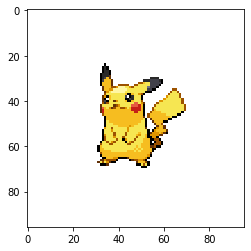

In [6]:
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

while True :
    try:
        pokemon_name = input("Masukkan Nama Pokemon: ")
        url = f"https://pokeapi.co/api/v2/pokemon/{pokemon_name}" #Getting Url Pokemon

        data_pokemon = requests.get(url) # request ke API pokemon
        output = data_pokemon.json() 
        print(f"Nama Pokemon: {output['name']}") #Nama Character
        print(f"HP : {output['stats'][0]['base_stat']}") #HP Character 
        print(f"Attack: {output['stats'][1]['base_stat']}") #Attack
        print(f"Defence: {output['stats'][2]['base_stat']}") #Defend
        print(f"Special attack: {output['stats'][3]['base_stat']}") #Special Attack
        print(f"Special defense: {output['stats'][4]['base_stat']}")# Special Defend
        print(f"Speed: {output['stats'][5]['base_stat']}") #kecepatan character
        print("Type:")
        for i in range(len(output['types'])):
            print(f"{i+1} {output['types'][i]['type']['name']}")
        gambar_pokemon = output['sprites']['front_default']
        img = mpimg.imread(gambar_pokemon)
        imgplot = plt.imshow(img)
        print(f"Gambar karakter pokemon: {imgplot}")
        print("Ability Name: ")
        for i in range(len(output['abilities'])):# abilities
            print(f"{i+1}.  {output['abilities'][i]['ability']['name']}")# abilities
        break
    except:
        print("Character Tidak ada, silahkan liat daftar character di: https://gamestation.co.id/inilah-list-lengkap-pokemon-termasuk-pokemon-legendaris-dan-pokemon-region-eksklusif/ ")
        continue



In [ ]:
import requests

pokemon_name = input("please input the pokemon you're looking for: ")
url = f"https://pokeapi.co/api/v2/pokemon/{pokemon_name}"

data_pokemon = requests.get(url)
output = data_pokemon.json()

while output == KeyError:
    print('Cant Find Pokemon please re input')
    pokemon_name = input("please input the pokemon you're looking for: ")
    url = f"https://pokeapi.co/api/v2/pokemon/{pokemon_name}"

    data_pokemon = requests.get(url)
    output = data_pokemon.json()

In [18]:
import requests

Host = 'https://developers.zomato.com/api/v2.1' #host untuk akses API
Key = '5d7b6a190680b1e7055412be09e73580' #key untuk get API
Headinfo = {"user-key": Key} # key API
# https://developers.zomato.com/api/v2.1/search?entity_id=84&entity_type=city&q=jewel&count=1
resto = input("Masukan Nama Restaurant: ")
kota = input("Masukan Nama Kota: ")
jumlah_menu = int(input("Jumlah menu restaurant yang akan ditampilkan: "))
#Mencari ID Nama kota yang diinput
loc = '/cities'
url_kota = f"{Host}{loc}?q={kota}" #url untuk mendapatkan ID nama kota
data_kota = requests.get(url_kota, headers = Headinfo)
output = data_kota.json()
lokasi = output['location_suggestions']
loc_id =(lokasi[0]['id'])
cari = '/search'
url_search = f"{Host}{cari}?entity_id={loc_id}&entity_type=city&q={resto}&count=1" #url untuk melihat restaurant yang ada dikota tersebut
data_cari = requests.get(url_search, headers =Headinfo)
hasil = data_cari.json()
resto_id =  (hasil["restaurants"][0]["restaurant"]['id'])
nama_resto =  (hasil["restaurants"][0]["restaurant"]["name"])
url_resto= f"{Host}/dailymenu?res_id={resto_id}"
data_resto = requests.get(url_resto, headers =Headinfo)
hasil_resto = data_resto.json()
# print (hasil_resto['code'])
while hasil_resto['code'] == 400:
        print("Resto tidak menampilkan daily menu, silahkan cari resto lain")
        resto = input("Masukan Nama Restaurant: ")
        kota = input("Masukan Nama Kota: ")
        jumlah_menu = int(input("Jumlah menu restaurant yang akan ditampilkan: "))
        #Mencari ID Nama kota yang diinput
        loc = '/cities'
        url_kota = f"{Host}{loc}?q={kota}" #url untuk mendapatkan ID nama kota
        data_kota = requests.get(url_kota, headers = Headinfo)
        output = data_kota.json()
        lokasi = output['location_suggestions']
        loc_id =(lokasi[0]['id'])
        cari = '/search'
        url_search = f"{Host}{cari}?entity_id={loc_id}&entity_type=city&q={resto}&count=1" #url untuk melihat restaurant yang ada dikota tersebut
        data_cari = requests.get(url_search, headers =Headinfo)
        hasil = data_cari.json()
        resto_id =  (hasil["restaurants"][0]["restaurant"]['id'])
        nama_resto =  (hasil["restaurants"][0]["restaurant"]["name"])
        url_resto= f"{Host}/dailymenu?res_id={resto_id}"
        data_resto = requests.get(url_resto, headers =Headinfo)
        hasil_resto = data_resto.json()

print(f"Menu di restoran tersebut sejumlah: {len(hasil_resto['daily_menus'][0]['daily_menu']['dishes'])} ")
for i  in range (jumlah_menu):
    print(f"{i+1}.Nama Makanan {hasil_resto['daily_menus'][0]['daily_menu']['dishes'][i]['dish']['name']}")
    print(f"  Harga Makanan    {hasil_resto['daily_menus'][0]['daily_menu']['dishes'][i]['dish']['price']}")
        
# except:
#     print('Nama kota tidak ada di bumi')


Masukan Nama Restaurant: kfc
Masukan Nama Kota: jakarta
Jumlah menu restaurant yang akan ditampilkan: 3
Resto tidak menampilkan daily menu, silahkan cari resto lain
Masukan Nama Restaurant: jewel
Masukan Nama Kota: prague
Jumlah menu restaurant yang akan ditampilkan: 23


KeyError: 'code'

In [70]:
import requests

Host = 'https://developers.zomato.com/api/v2.1' #host untuk akses API
Key = '5d7b6a190680b1e7055412be09e73580' #key untuk get API
Headinfo = {"user-key": Key} # key API

#Mencari ID Nama kota yang diinput
loc = '/cities' 
kota = input("Masukan Nama Kota: ")
url_kota = f"{Host}{loc}?q={kota}" #url untuk mendapatkan ID nama kota
while (cuaca['cod'] == "404"):
try :
    data_kota = requests.get(url_kota, headers = Headinfo)
    output = data_kota.json()
    lokasi = output['location_suggestions']
    loc_id =(lokasi[0]['id'])
    cari = '/search'
    jumlah_resto = (int(input("Masukan jumlah restoran yang akan ditampilkan: ")))
    url_search = f"{Host}{cari}?entity_id={loc_id}&entity_type=city&count={jumlah_resto}" #url untuk melihat restaurant yang ada dikota tersebut
    data_cari = requests.get(url_search, headers =Headinfo)
    hasil = data_cari.json()
    nama =  (hasil["restaurants"][i]["restaurant"]["name"])
    for i  in range (jumlah_resto):
        print(f"{i+1}. Restaurant name: {hasil['restaurants'][i]['restaurant']['name']}")
        print(f"   Establishment name: {hasil['restaurants'][i]['restaurant']['establishment']}")
        print(f"   Cuisine name: {hasil['restaurants'][i]['restaurant']['cuisines']}")
        print(f"   Address: {hasil['restaurants'][i]['restaurant']['location']['address']}")
        print(f"   Phone number: {hasil['restaurants'][i]['restaurant']['phone_numbers']}")
        print(f"   Rating: {hasil['restaurants'][i]['restaurant']['user_rating']['aggregate_rating']}")
        print(f"   Total review: {hasil['restaurants'][i]['restaurant']['all_reviews_count']}")
except:
    print('Nama kota tidak ada di bumi')
# url_search = f"{Host}{cari}?entity_id={loc_id}&entity_type=city&count={}"
# cari = '/search'
# https://developers.zomato.com/api/v2.1/search?entity_id=11052&entity_type=city&count=1"

Masukan Nama Kota: indian
Masukan jumlah restoran yang akan ditampilkan: prague
Nama kota tidak ada di bumi


# 